# OPTIMUM WIENER FILTER
I applied Optimum Wiener Filter for my thesis research of my undergraduate degree. I used MATLAB at the time and in this notebook I would try to apply Object Oriented Program (OOP) for wiener filter. The objective of this filter to enhance the resolution of inverted seismic data thus increasing the certainty. The input is seismic inverted data, the desired output is based on log data, the actual output is the result of applied filter. Take a look at the flowchart to understand how optimum wiener filter works based on Robinson and Treitel (2006). 
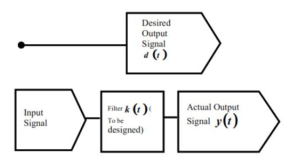


In [1]:
##IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy import ndimage
from sklearn import metrics

In [2]:
#Class of creating wiener filter
class wienerFilter:

    #it = input data
    #dt = desired output
    #ct = actual output
        def __init__(self,it,dt,depth):
            self.it = it
            self.dt = dt
            self.depth = depth
        
        def createfilter(self):
            acor = np.correlate(self.it,self.it,mode='full'); acor = acor[len(self.it)-1:]
            acor = acor.reshape(len(acor),1);
            xcor = np.correlate(self.dt,self.it,mode='full'); xcor = xcor[len(self.dt)-1:]
            xcor = xcor.reshape(len(acor),1);
            rx = linalg.toeplitz(acor)
            invrx = np.linalg.inv(rx)
            self.ft = invrx.dot(xcor)
            return self.ft
        
        def desired_output(self):
            self.ft=np.ndarray.flatten(self.ft)
            self.ct=np.convolve(self.it,self.ft)
            self.ct=self.ct[:len(self.dt)]
            return self.ct
        
        def errorcalc(self):
            print('ERROR Calculation')
            print('Before Application:',metrics.mean_absolute_error(self.dt, self.it))
            print('Mean Absolute Error:', metrics.mean_absolute_error(self.dt, self.ct))
            print('Mean Squared Error:', metrics.mean_squared_error(self.dt, self.ct))
            print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(self.dt, self.ct)))
            
        def plot_comparison(self):
            fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,10))
            ax1.plot(self.dt,self.depth)
            ax1.plot(self.it,self.depth)
            ax1.set_title('Input Data')
            ax1.legend(['desired output','input'])
            ax1.axis('on')
            ax1.invert_yaxis()
            ax1.set_ylabel('Time(ms)')
            ax1.set_xlabel('Inverted S-Imp')
            ax2.plot(self.dt,self.depth)
            ax2.plot(self.ct,self.depth)
            ax2.set_title('Wiener Filter Applied')
            ax2.legend(['desired output','actual output'])
            ax1.set_xlabel('Inverted S-Imp')
            ax2.axis('on')
            ax2.invert_yaxis()
                
        def corr_comparison(self):
            from numpy.polynomial.polynomial import polyfit
            b1, m1 = polyfit(self.dt, self.it, 1)
            b2, m2 = polyfit(self.dt, self.ct, 1)
            fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,8))
            ax1.scatter(self.dt,self.it)
            ax1.plot(self.dt, b1 + m1 * self.dt)
            ax1.set_title('Before application\nCorr. Coef:'+str(m1))
            ax1.axis('on')
            ax1.set_ylabel('Input')
            ax1.set_xlabel('Desired Output')
            ax2.scatter(self.dt,self.ct)
            ax2.plot(self.dt, b2 + m2 * self.dt)
            ax2.set_title('Wiener Filter Applied\nCorr. Coef:'+str(m2))
            ax2.set_xlabel('Desired Output')
            ax2.set_ylabel('Actual Input')
            ax2.axis('on')

In [221]:
trial=pd.read_csv('dummy_data.csv',header=None)
trial.columns=['time','si','zs']
trial.describe()

,time,si,zs
count,98.000000,98.000000,98.000000
mean,703.000000,4648.778057,4672.446447
std,56.868269,1223.949314,1129.088557
min,606.000000,1261.741600,2115.090100
25%,654.500000,4189.181900,3915.619050
50%,703.000000,4621.724150,4628.235100
75%,751.500000,5376.348600,5430.493775
max,800.000000,7252.508300,7023.262700


# Log Based Wiener Filter Application

ERROR Calculation
Before Application: 836.3769204081632
Mean Absolute Error: 470.697511154736
Mean Squared Error: 397289.55154297326
Root Mean Square Error: 630.3090920675136


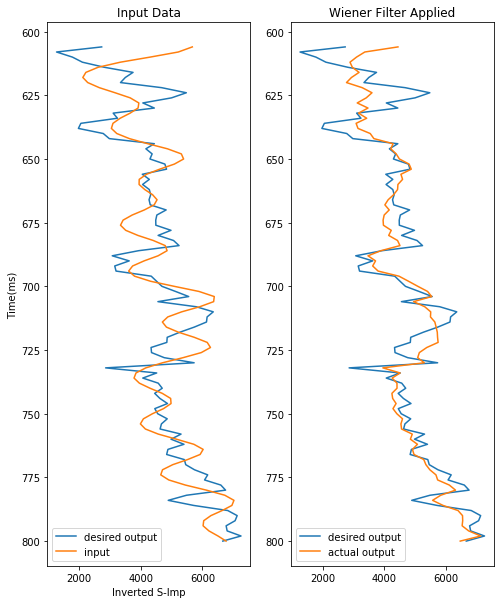

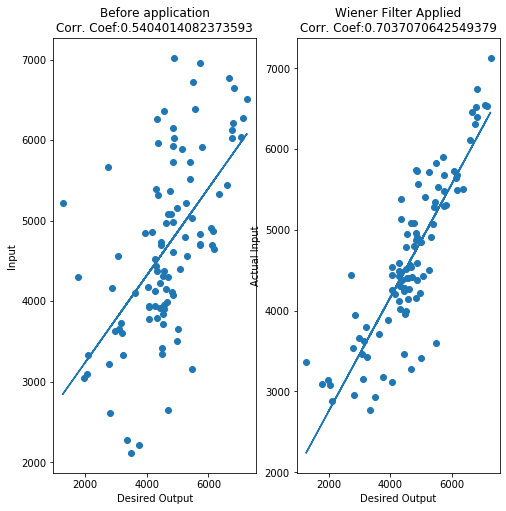

In [244]:
fwo=wienerFilter(trial['zs'],trial['si'],trial['time'])
fwo.createfilter()
fwo.desired_output()
fwo.errorcalc()
fwo.plot_comparison()
fwo.corr_comparison()